In [14]:
import numpy as np 
import pandas as pd 
import os, re, random, zipfile, pathlib, cv2, PIL, pickle
np.random.seed(2)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import PIL.Image
from sklearn.model_selection import train_test_split
import itertools
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from tensorflow import keras
from keras import layers, optimizers, models, layers, callbacks, regularizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, GlobalMaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import VGG16
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras import models, layers, callbacks, regularizers
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, zero_one_loss
tf.keras.backend.set_floatx("float32")
%load_ext tensorboard
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)

In [16]:
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/pured-cats-dogs/CatsDogs',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        subset= 'training',
         shuffle=True)

Found 20000 images belonging to 2 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
   '/kaggle/input/pured-cats-dogs/CatsDogs',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True) # set as validation data

Found 4998 images belonging to 2 classes.


In [18]:
# Define our pre-trained model
base = VGG16(input_shape=(64,64,3), include_top=False, weights="imagenet")

In [19]:
model = Sequential([base, GlobalMaxPooling2D(), Dense(512, activation='relu'), Dropout(0.5),Dense(1, activation = "sigmoid")])
model.layers[0].trainable = False


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,977,857
Trainable params: 263,169
Non-trainable params: 14,714,688
____________________________________

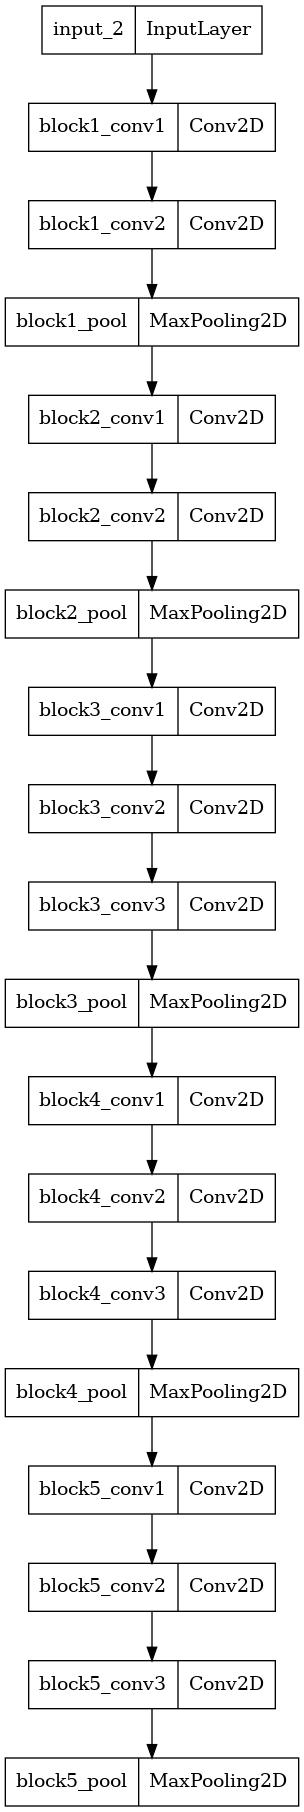

In [21]:
tf.keras.utils.plot_model(base, 'vgg_additional_block_adam.jpg')

In [22]:
# Compile model
model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy']
                 )

In [23]:
epochs = 10
history = model.fit(
    train_generator, 
    epochs= epochs,
    validation_data=validation_generator
)

Epoch 1/10
556/625 [=========================>....] - ETA: 7s - loss: 0.4898 - accuracy: 0.7637

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 90s 143ms/step - loss: 0.4882 - accuracy: 0.7634 - val_loss: 0.4395 - val_accuracy: 0.7887
Epoch 2/10
625/625 [==============================] - 88s 140ms/step - loss: 0.4495 - accuracy: 0.7858 - val_loss: 0.4491 - val_accuracy: 0.7839
Epoch 3/10
625/625 [==============================] - 88s 141ms/step - loss: 0.4322 - accuracy: 0.7947 - val_loss: 0.4468 - val_accuracy: 0.7843
Epoch 4/10
625/625 [==============================] - 86s 138ms/step - loss: 0.4222 - accuracy: 0.8018 - val_loss: 0.4184 - val_accuracy: 0.8007
Epoch 5/10
625/625 [==============================] - 88s 140ms/step - loss: 0.4157 - accuracy: 0.8051 - val_loss: 0.4132 - val_accuracy: 0.8045
Epoch 6/10
625/625 [==============================] - 91s 145ms/step - loss: 0.4055 - accuracy: 0.8111 - val_loss: 0.4177 - val_accuracy: 0.7985
Epoch 7/10
625/625 [==============================] - 89s 143ms/step - loss: 0.3987 - accuracy: 0.8153 - val_loss: 0.4110 - val_accuracy: 0.8

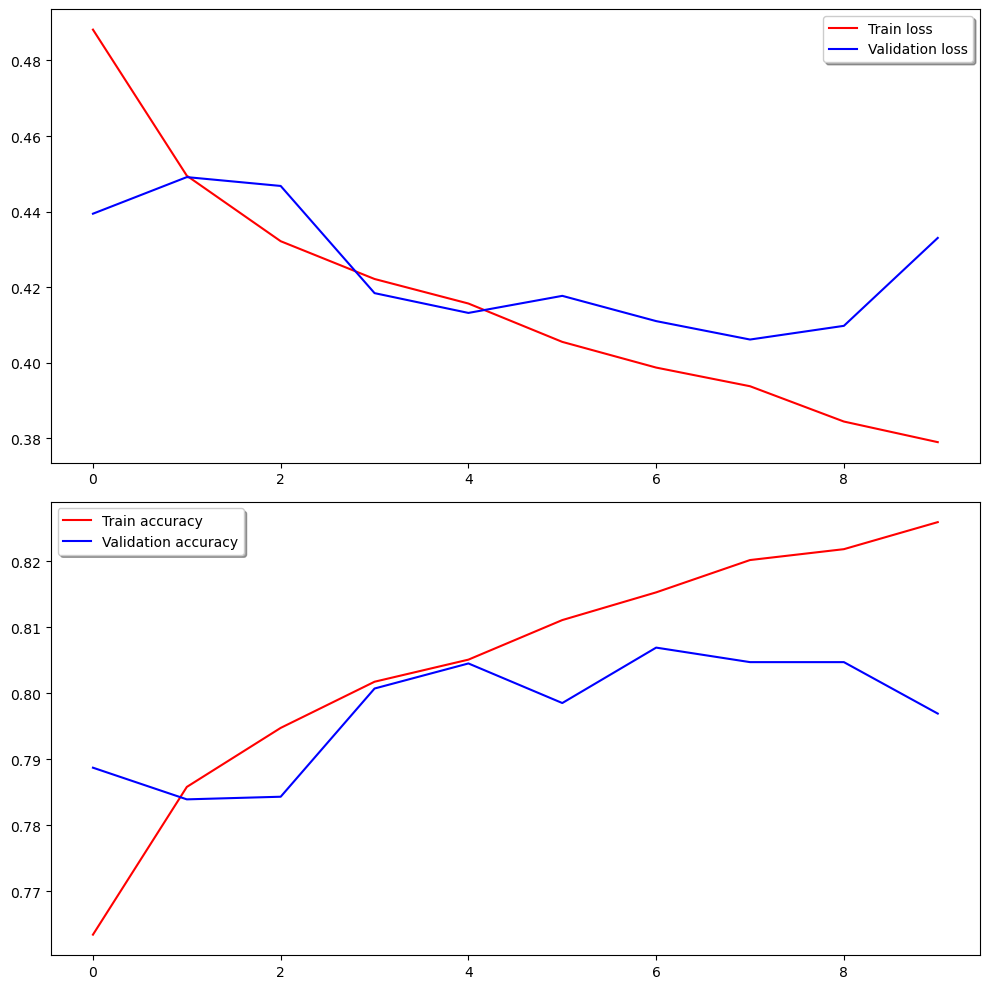

In [24]:
# Plot accuracy and loss curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(history.history['loss'], color='r', label="Train loss")
ax1.plot(history.history['val_loss'], color='b', label="Validation loss")
#ax1.set_xticks(np.arange(1, epochs, 1))
legend = ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='r', label="Train accuracy")
ax2.plot(history.history['val_accuracy'], color='b',label="Validation accuracy")
#ax2.set_xticks(np.arange(1, epochs, 1))
legend = ax2.legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

In [25]:
model.save('vgg_additional_block_adam.h5')